In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [82]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [83]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df.shape

(42000, 785)

In [85]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [86]:
df.duplicated().sum()

0

In [87]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [88]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22051,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


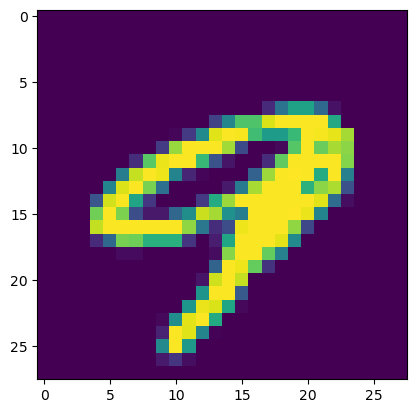

In [89]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[12663,1:].values.reshape(28, 28))

In [90]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
X_train.shape

(33600, 784)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn=KNeighborsClassifier()

In [95]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
y_pred=knn.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

let's try on pca

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [99]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [100]:
#pca-

from sklearn.decomposition import PCA
# pca=PCA(n_components=None)
#when none, the pc's to be formed=num of cols in data

pca=PCA(n_components=100)
#best , top 100 pc's

In [101]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)

earlier, the 784 dim plane:

In [102]:
X_train.shape

(33600, 784)

In [103]:
X_train_trf.shape # now we have only 100 cols in transformed space

(33600, 100)

In [104]:
#eigen values:
pca.explained_variance_

array([40.87278367, 28.96628019, 27.04280036, 20.68678826, 18.03022009,
       15.56769344, 13.71800977, 12.85539242, 11.30290315, 10.14033052,
        9.76923277,  8.82905485,  8.06129127,  7.88487998,  7.6070017 ,
        7.23557523,  6.82237579,  6.81508074,  6.48782639,  6.39912764,
        6.13345339,  5.76251278,  5.57608457,  5.44991062,  5.31117542,
        5.15525383,  5.01757071,  4.81393929,  4.73581088,  4.55303944,
        4.51914518,  4.4013123 ,  4.31654857,  4.11992538,  4.06413614,
        4.00019746,  3.97200613,  3.87430396,  3.79558617,  3.64616739,
        3.56447713,  3.53117907,  3.45622671,  3.40602686,  3.28711509,
        3.221244  ,  3.16539619,  3.15935211,  3.1060608 ,  3.06919193,
        3.01509349,  2.99115788,  2.94501701,  2.88384823,  2.83322873,
        2.80064269,  2.72467351,  2.69466564,  2.61313517,  2.58779792,
        2.56043784,  2.52885603,  2.47851768,  2.46892342,  2.42926961,
        2.39978663,  2.35237967,  2.32790985,  2.28434438,  2.25

In [105]:
#eigen vactors

pca.components_

array([[ 9.13337949e-17, -2.03667912e-17, -5.80336614e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.29471437e-17, -7.40701261e-17, -2.02746071e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.85928759e-17, -4.87886102e-17, -1.11253659e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-4.06199660e-17, -1.85923257e-17, -1.36039030e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.75047288e-17,  2.08453361e-17,  7.91767475e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.11392142e-17, -3.33785439e-17,  1.32835928e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [106]:
pca.components_.shape # 3 vectors, with 784 components

(100, 784)

In [107]:
knn=KNeighborsClassifier()

In [108]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [109]:
y_pred=knn.predict(X_test_trf)

In [110]:
accuracy_score(y_test, y_pred)

0.6813095238095238

In [111]:
# we can inc/dec pc's to get the best accuracy

In [112]:
# for i in range(1, 785):
for i in range(1, 10):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.fit_transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred=knn.predict(X_test_trf)
    print("n_components: ",i, '           accuracy_score: ',accuracy_score(y_pred, y_test))

n_components:  1            accuracy_score:  0.25547619047619047
n_components:  2            accuracy_score:  0.3244047619047619
n_components:  3            accuracy_score:  0.5042857142857143
n_components:  4            accuracy_score:  0.6551190476190476
n_components:  5            accuracy_score:  0.7226190476190476
n_components:  6            accuracy_score:  0.8179761904761905
n_components:  7            accuracy_score:  0.8354761904761905
n_components:  8            accuracy_score:  0.8644047619047619
n_components:  9            accuracy_score:  0.8771428571428571


In [113]:
pca.explained_variance_

array([40.87278367, 28.96628019, 27.04280035, 20.6867882 , 18.03021765,
       15.5676885 , 13.71798967, 12.85528619, 11.30247266])

In [114]:
pca.components_

array([[-7.16935527e-19, -5.02243569e-19, -1.42416744e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.04386102e-17,  1.79783429e-17,  2.76929193e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.63646186e-17, -2.81368150e-17,  6.23951543e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 2.08491269e-17,  5.46778208e-17, -3.96521058e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.81457100e-17, -2.15949829e-17, -1.84553977e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.45795034e-18, -9.05451592e-17, -3.26918521e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [115]:
pca.explained_variance_ratio_ *100 # kitna % var is explained bu respective pca

array([6.05450635, 4.2907899 , 4.00586385, 3.06434452, 2.67082536,
       2.30604966, 2.03205283, 1.90426012, 1.67424106])

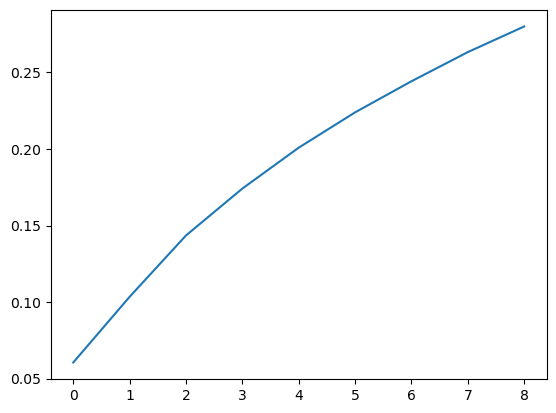

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ ))

In [117]:
#now observe kitne components ki zrurat he in order to explain >=90% varaince